# Systems of Linear Equations

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
import sys
from pathlib import Path
from typing import Optional, Sequence, TypeVar

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import rich
from IPython.display import display

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.utils.visualization.matplotlib_wrapper import plot_line, plot_scatter
else:
    raise ImportError("Root directory not found.")

use_svg_display()

This is a first introduction to systems of linear equations. We'll start with a
motivating example, then define the general form of linear equations, and
finally discuss the geometric interpretation of linear equations. This is
definitely not the most rigorous treatment of the topic, but it should be
sufficient for our purposes. We will dive deeper into the topic in later
chapters, talking about it through the lens of vectors and matrices.

## Motivation

Let's explore a detailed example to better motivate systems of linear equations.
We'll examine Example 2.1 from Section 2.1, titled 'Systems of Linear
Equations', on page 19 of the book 'Mathematics for Machine Learning' by
Deisenroth, Faisal, and Ong (2020) {cite}`deisenroth2020mathematics`. This
example provides an insightful application of these concepts in a practical
context.

1. **Context**: We have a company that produces a set of products
   $N_1, \ldots, N_n$. These products require resources $R_1, \ldots, R_m$ to be
   produced.

2. **Resource Requirements**: Each product $N_j$ requires a certain amount of
   each resource $R_i$. This amount is denoted by $a_{ij}$. For instance,
   $a_{ij}$ is the amount of resource $R_i$ needed to produce one unit of
   product $N_j$.

3. **Objective**: The company wants to find an optimal production plan. This
   means deciding how many units $x_j$ of each product $N_j$ to produce, given
   the constraint of available resources.

4. **Available Resources**: The total available units of each resource $R_i$ is
   given by $b_i$.

5. **System of Linear Equations**: The heart of the problem is to determine the
   values of $x_j$ (the quantity of each product to produce) such that all
   resources are optimally used (ideally, no resources are left over).

    To do this, we set up a system of linear equations. For each resource $R_i$,
    the total consumption by all products should be equal to the available
    amount of that resource $b_i$. This leads to the equation:

    ```{math}
    :label: 02-systems-of-linear-equations-eq-1

    a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{in}x_n = b_i
    ```

    for each $i = 1, \ldots, m$. Here, $a_{i1}x_1$ represents the amount of
    resource $R_i$ used by product $N_1$, $a_{i2}x_2$ by product $N_2$, and so
    on.

6. **Solution**: Consequently, an **_optimal production plan_**
   $\left(x_1^*, \ldots, x_n^*\right)$ is one that satisfies the system of
   linear equations in {eq}`02-systems-of-linear-equations-eq-1`:

    ```{math}
    :label: 02-systems-of-linear-equations-eq-2

    \begin{aligned}
        & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n && = && \ b_1 \\
        & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n && = && \ b_2 \\
        & \vdots && && \ \vdots \\
        & a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n && = && \ b_m
    \end{aligned}
    ```

    where

    - $a_{ij} \in \mathbb{R}$ is the amount of resource $R_i$ needed to produce
      one unit of product $N_j$.
    - $b_i \in \mathbb{R}$ is the total available units of resource $R_i$. This
      is the constraint on the amount of resource $R_i$ that can be used.

    Equation {eq}`02-systems-of-linear-equations-eq-2` is what we call the
    general form of a _system of linear equations_. The unknowns are the
    quantities $x_1, \ldots, x_n$ of each product to produce. The coefficients
    $a_{ij}$ represent the amount of resource $R_i$ needed to produce one unit
    of product $N_j$. The constants $b_i$ represent the total available units of
    resource $R_i$. Finally, every $n$-tuple $\left(x_1^*, \ldots, x_n^*\right)$
    that satisfies {eq}`02-systems-of-linear-equations-eq-2` is a solution to
    the system of linear equations.

    In other words, the optimal production plan is the solution to the system of
    linear equations. This solution is unique if the system is
    [**consistent**](https://en.wikipedia.org/wiki/Consistent_and_inconsistent_equations)
    (i.e., has at least one solution). If the system is
    [**inconsistent**](https://en.wikipedia.org/wiki/Consistent_and_inconsistent_equations)
    (i.e., has no solution), then there is no optimal production plan.

In summary, this example illustrates how a practical problem in production
planning can be modeled using linear algebra. The system of linear equations is
central to finding an optimal solution that maximizes resource utilization.

### Analogy: Bakery

1. **Products ($N_j$)**: Imagine a bakery that makes various types of bread and
   pastries. These could be:

    - $N_1$: Loaves of whole wheat bread
    - $N_2$: Baguettes
    - $N_3$: Croissants
    - ... and so on, up to $N_n$ being the $n$-th type of bread or pastry.

2. **Resources ($R_i$)**: The resources are the ingredients and materials needed
   to make these breads and pastries. Examples include:

    - $R_1$: Flour
    - $R_2$: Yeast
    - $R_3$: Butter
    - $R_4$: Sugar
    - ... up to $R_m$, the $m$-th resource.

3. **Resource Requirements ($a_{ij}$)**: Each type of bread or pastry requires
   specific amounts of these ingredients. For example:

    - To make one loaf of whole wheat bread ($N_1$), you might need:
        - 2 units of flour ($a_{11} = 2$),
        - 1 unit of yeast ($a_{21} = 1$),
        - 3 units of butter ($a_{31} = 3$), and
        - no sugar ($a_{41} = 0$).

4. **Optimal Production Plan**: The bakery needs to decide how many of each type
   of bread and pastry to bake each day. This decision is based on the available
   ingredients. For instance, if they have 100 units of flour, 50 units of
   yeast, 30 units of butter, and 20 units of sugar, how many loaves of whole
   wheat bread, baguettes, croissants, etc., should they bake to use all these
   ingredients efficiently without any waste?

5. **System of Linear Equations**: This situation can be modeled as a system of
   linear equations. Each equation corresponds to one resource, equating the
   total amount of that resource used by all products to the available amount.
   Solving these equations gives the bakery the optimal number of each type of
   bread and pastry to bake.

## General Form of Linear Equations

Without touching on the concept of vectors and matrices, we can define a system
of linear equations purely in terms of algebraic equations with a geometric
interpretation.

### System of Linear Equations (Algebraic Form)

````{prf:definition} System of Linear Equations (Algebraic Form)
:label: 02-systems-of-linear-equations-definition-algebraic-form

A general system of $N$ linear equations with $D$ unknowns is given by:

```{math}
:label: 02-systems-of-linear-equations-definition-algebraic-form-eq-1

\begin{aligned}
    & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1D}x_D && = && \ b_1 \\
    & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2D}x_D && = && \ b_2 \\
    & \ \ \vdots \\
    & a_{N1}x_1 + a_{N2}x_2 + \cdots + a_{ND}x_D && = && \ b_N
\end{aligned}
```

where

-   $x_{d}$ (for $d = 1, \ldots, D$) are the unknowns,
-   $a_{n,d}$ (for $n = 1, \ldots, N$ and $d = 1, \ldots, D$) are the
    coefficients of the unknowns, and
-   $b_n$ (for $n = 1, \ldots, N$) are the constants.
````

The choice of using $N$ and $D$ for the number of equations and unknowns instead
of $m$ and $n$ is intentional. In the context of machine learning, the notations
$N$ and $D$ are commonly used to represent the following:

-   $N$: The number of samples or observations in a dataset. In a dataset
    comprising multiple individual data points (like patients in a medical
    study, images in a computer vision task, or days in a time series analysis),
    $N$ is typically used to denote the total count of these data points.

-   $D$: The number of features or dimensions for each sample. In machine
    learning, each data point is often described by a set of features or
    attributes. For example, in a dataset of houses, the features might include
    the number of rooms, square footage, location, age of the building, etc. $D$
    represents the total count of these features.

Furthermore, in machine learning context, the $a_{n,d}$ presented in
{eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1` are often
referred to as **_features_** or **_attributes_**. The $x_{d}$ are referred to
as **_weights_** or **_coefficients_** of the features (i.e. how much weight we
give to each feature when making a prediction). The $b_n$ are referred to as
**_labels_** or **_targets_**. For that reason, we often **reframe** the linear
equations in {eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1`
as:

```{math}
:label: 02-systems-of-linear-equations-definition-algebraic-form-eq-2

\begin{aligned}
    & \theta_{1}x_{1,1} + \theta_{2}x_{1,2} + \cdots + \theta_{D}x_{1,D} && = && \ y_1 \\
    & \theta_{1}x_{2,1} + \theta_{2}x_{2,2} + \cdots + \theta_{D}x_{2,D} && = && \ y_2 \\
    & \ \ \vdots \\
    & \theta_{1}x_{N,1} + \theta_{2}x_{N,2} + \cdots + \theta_{D}x_{N,D} && = && \ y_N
\end{aligned}
```

where:

-   $\theta_{d} \in \mathbb{R}$ (for $d = 1, \ldots, D$) are the coefficients or
    weights associated with each feature, assumed constant across all samples,
    meaning the coefficients $\theta_{d}$ are the same for each sample $n$.

    This notation replaces the $x_{d}$ in the previous definition
    {eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1` and is
    the unknowns in the system of linear equations.

-   $x_{n,d} \in \mathbb{R}$ (old $a_{n, d}$) represents the value of the $d$-th
    feature for the $n$-th sample, and
-   $y_n \in \mathbb{R}$ (for $n = 1, \ldots, N$) are the target or outcome
    values for each sample. This notation replaces the $b_n$ in the previous
    definition
    {eq}`02-systems-of-linear-equations-definition-algebraic-form-eq-1`.

## System of Linear Equations (Geometric Interpretation)

Consider a system of linear equations with two unknowns $x$ and $y$:

```{math}
:label: 02-systems-of-linear-equations-geometric-interpretation-eq-1

\begin{aligned}
    & \color{blue} 4x + 4y && \color{blue} = && \color{blue} 6 \\
    & \color{red}  2x - 4y && \color{red}  = && \color{red} 0
\end{aligned}
```

where we can solve it algebraically to obtain the solution using the
[elimination method](https://en.wikipedia.org/wiki/System_of_linear_equations#Solving_a_linear_system).

### Solution Space in 2D (Lines)

We can also interpret this system of linear equations geometrically. The point
$(x, y)$ that satisfies both equations is the intersection of the two lines.

There are three possible outcomes:

-   The lines intersect at a single point. This means there is a unique solution
    to the system of linear equations.
-   The lines are parallel. This means there is no solution to the system of
    linear equations.
-   The lines are the same. This means there are infinitely many solutions to
    the system of linear equations.

#### Case 1: Unique Solution

Consider the equation in
{eq}`02-systems-of-linear-equations-geometric-interpretation-eq-1` where the two
lines intersect at a single point $(x, y)$. How do we know? Well, a rudimentary
way will be to plot the two lines and see if they intersect at a single point.
This is naive because this is the classical "proof by inspection" method, and
there is no guarantee our eyes won't fail us. But before we learn more formal
methods (or just solving this linear equation by hand or by a graphic
calculator), this is a good enough approach.

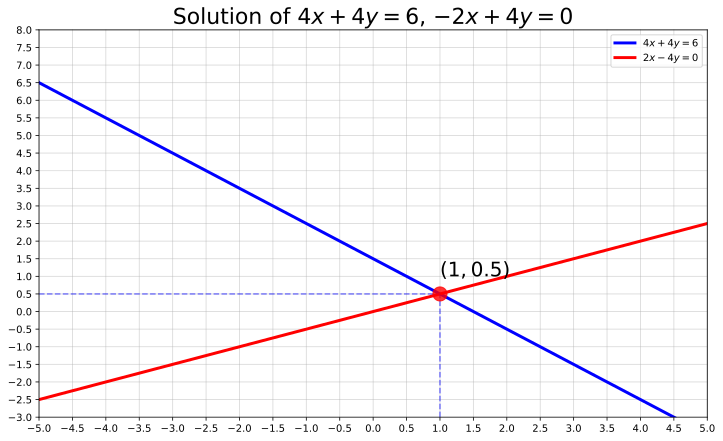

In [2]:
# Data preparation
x = np.linspace(-5, 5, 100)
y1 = (-4 * x + 6) / 4
y2 = 2 * x / 4

# Plot setup
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("Solution of $4x+4y=6$, $-2x+4y=0$", size=22)

# Plotting lines
plot_line(ax, x, y1, lw=3, label="$4x+4y=6$", color="b")
plot_line(ax, x, y2, lw=3, label="$2x-4y=0$", color="r")
plot_line(ax, [-5, 1], [0.5, 0.5], ls="--", color="b", alpha=0.5)
plot_line(ax, [1, 1], [-3, 0.5], ls="--", color="b", alpha=0.5)

# Adding scatter and text
s = "$(1,0.5)$"
ax.text(1, 0.5 + 0.5, s, fontsize=20)
plot_scatter(ax, 1, 0.5, s=200, zorder=5, color="r", alpha=0.8)

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

save_path = Path("./assets/02-systems-of-linear-equations-geometric-interpretation.svg")
if not save_path.exists():
    fig.savefig(save_path, dpi="figure", format="svg")

```{figure} ./assets/02-systems-of-linear-equations-geometric-interpretation.svg
---
name: 02-systems-of-linear-equations-geometric-interpretation
---
Geometric interpretation of the solution to the system of linear equations
$4x+4y=6$, $-2x+4y=0$.
```

More concretely, in a system of linear equations with two variables $x, y$, each
linear equation defines a line on the $x$-$y$ plane. Since a solution to a
system of linear equations must satisfy all equations simultaneously, the
solution set is the intersection of these lines. This intersection set can be a
**line** (if the linear equations describe the same line), a **point**, or
**empty** (when the lines are parallel) {cite}`deisenroth2020mathematics`. An
illustration is given in
{numref}`02-systems-of-linear-equations-geometric-interpretation` for the system
of linear equations in
{eq}`02-systems-of-linear-equations-geometric-interpretation-eq-1` where the
solution space is the point $(x, y) = (1, 0.5)$.

For the sake of completeness, let's consider two more examples of systems of
linear equations with two variables $x, y$ where either the solution space is a
line or empty.

#### Case 2: Infinite Solutions

This case corresponds to the solution space being a line. Consider the system of
linear equations that represent the same line:

```{math}
\begin{aligned}
    & \color{blue} x - y && \color{blue} = && \color{blue} 0 \\
    & \color{red} 2x - 2y && \color{red} = && \color{red} 0
\end{aligned}
```

These equations represent the same line. Any point on this line is a solution,
leading to infinitely many solutions.

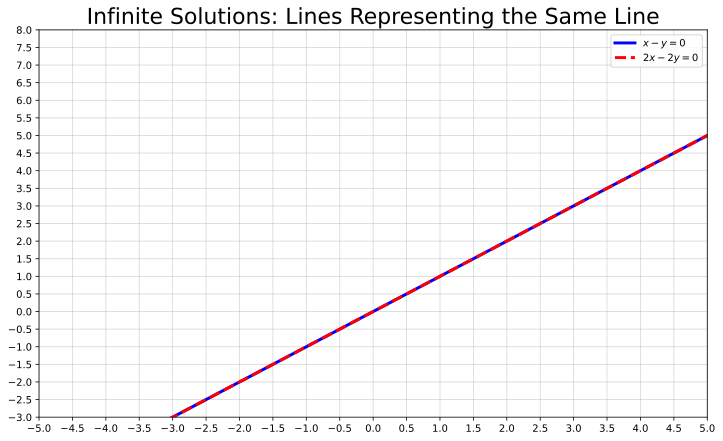

In [3]:
# Data preparation for case where solution space is a line
x = np.linspace(-5, 5, 100)
y_line = x  # y = x

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("Infinite Solutions: Lines Representing the Same Line", size=22)

# Plotting the same line twice
plot_line(ax, x, y_line, lw=3, label="$x - y = 0$", color="blue")
plot_line(ax, x, y_line, lw=3, label="$2x - 2y = 0$", color="red", ls='--')

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

#### Case 3: No Solution

This case corresponds to the solution space being empty. Consider the system of
linear equations representing parallel lines:

```{math}
\begin{aligned}
    & \color{blue} x - y && \color{blue} = && \color{blue} 1 \\
    & \color{red} x - y && \color{red} = && \color{red} 2
\end{aligned}
```

These equations represent parallel lines which never intersect. Therefore, there
is no point that satisfies both equations simultaneously, resulting in no
solution.

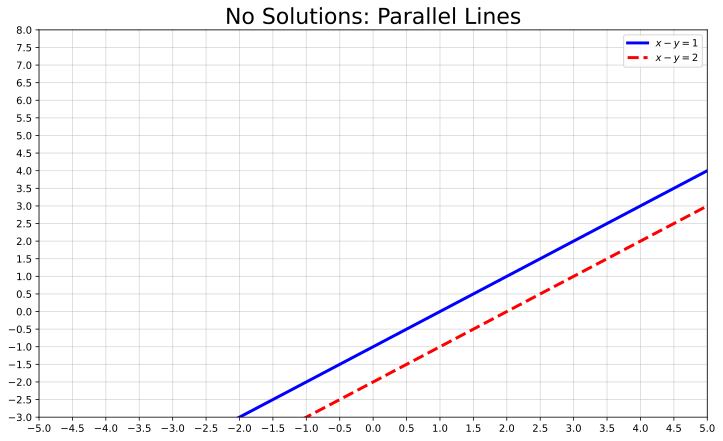

In [4]:
# Data preparation for case where solution space is empty
x = np.linspace(-5, 5, 100)
y1_empty = x - 1  # y = x - 1
y2_empty = x - 2  # y = x - 2

# Plot setup
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim([-5, 5])
ax.set_ylim([-3, 8])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_title("No Solutions: Parallel Lines", size=22)

# Plotting parallel lines
plot_line(ax, x, y1_empty, lw=3, label="$x - y = 1$", color="blue")
plot_line(ax, x, y2_empty, lw=3, label="$x - y = 2$", color="red", ls='--')

ax.legend()
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)

# Display plot
plt.show()

## Solution Space in 3D (Planes)

We have seen the geometric interpretation of the solution space in 2D-space
where the solution space is either a line, a point, or empty. In 3D-space, there
is a similar analogue. Consider the system of linear equations with three
unknowns $x, y, z$:

```{math}
:label: 02-systems-of-linear-equations-geometric-interpretation-eq-2

\begin{aligned}
    & \color{blue} a_{11}x + a_{12}y + a_{13}z && \color{blue} = && \color{blue} b_1 \\
    & \color{red}  a_{21}x + a_{22}y + a_{23}z && \color{red}  = && \color{red}  b_2 \\
    & \color{green} a_{31}x + a_{32}y + a_{33}z && \color{green} = && \color{green} b_3 \\
    & \vdots && && \ \ \vdots \\
    & \color{orange} a_{N1}x + a_{N2}y + a_{N3}z && \color{orange} = && \color{orange} b_N
\end{aligned}
```

Each equation in
{eq}`02-systems-of-linear-equations-geometric-interpretation-eq-2` defines a
[**plane**](<https://en.wikipedia.org/wiki/Plane_(geometry)>) in 3D-space. Since
a solution to a system of linear equations must satisfy all equations
simultaneously, the solution set is the intersection of these planes.

This time, we have four possible outcomes:

-   The planes intersect at a single point. This means there is a unique
    solution to the system of linear equations.
-   The planes intersect along a line. This means there are infinitely many
    solutions to the system of linear equations.
-   The planes intersect along a plane. This means there are infinitely many
    solutions to the system of linear equations. This means that if two or more
    planes are coincident (i.e., they are essentially the same plane), then
    their intersection is indeed a plane, and there are infinitely many
    solutions.
-   The planes are parallel. This means there is no solution to the system of
    linear equations.

One thing to mention is that for point 1, it does not hold if you only use two
planes, because two planes cannot intersect at a single point in 3D-space (may
behave
[differently](https://math.stackexchange.com/questions/219233/can-two-planes-intersect-in-a-point)
in 4D-space). Indeed, if you have two linear equations of the form:

```{math}
\begin{aligned}
    & \color{blue} a_{11}x + a_{12}y + a_{13}z && \color{blue} = && \color{blue} b_1 \\
    & \color{red}  a_{21}x + a_{22}y + a_{23}z && \color{red}  = && \color{red}  b_2
\end{aligned}
```

then it is what we call an **_underdetermined system_** of linear equations,
where the number of equations is less than the number of unknowns. In this case,
it coincides with our intuition that two planes can only intersect along a line,
be parallel, or be the same plane. And if they do intersect, then it must have
infinitely many solutions.

To see all these cases in action, I refer you to follow
[Chen Weijie's Linear Algebra with Python notebook](https://github.com/weijie-chen/Linear-Algebra-With-Python/blob/master/Chapter%201%20-%20Linear%20Equation%20System.ipynb).

## Planes

Here's a refresher on planes in 3D-space. If this is your first read, then you
may want to skip this section and come back to it later because we will assume a
future knowledge on dot product.

The treatment below concerns planes embedded in three dimensions, especially in
$\mathbb{R}^3$. Therefore, these planes are necessarily a
2D-[**subspace**](https://en.wikipedia.org/wiki/Linear_subspace). We state this
only for formality and for completeness, that a plane residing in 3D-space is a
2D-subspace even though it consists of 3D-vectors is because the very definition
of the dimensionality of a subspace is determined by the number of linearly
independent vectors that span the subspace, not by the dimensionality of the
ambient space (in this case, 3D-space). By extension, a line in 3D-space is a
1D-subspace, and a point in 3D-space is a 0D-subspace.

### Properties of 2D-Planes

The following statements hold in three-dimensional Euclidean space but not in
higher dimensions, though they have higher-dimensional analogues:

-   Two distinct planes are either parallel or they intersect in a
    [line](<https://en.wikipedia.org/wiki/Line_(geometry)>).
-   A line is either parallel to a plane, intersects it at a single point, or is
    contained in the plane.
-   Two distinct lines
    [perpendicular](https://en.wikipedia.org/wiki/Perpendicular) to the same
    plane must be parallel to each other.
-   Two distinct planes perpendicular to the same line must be parallel to each
    other.

### Plane's Equations

#### Plane Equation in Normal Form (Vector Form)

In linear algebra, the equation of a plane in three-dimensional space can be
derived using the concept of
[**normal vectors**](<https://en.wikipedia.org/wiki/Normal_(geometry)>). Let's
consider a plane embedded in a 3-D space.

Firstly, we assume the existence of a
[**point**](<https://en.wikipedia.org/wiki/Point_(geometry)>)
$P_0 = (x_0, y_0, z_0)$ on the plane. Additionally, we define a normal
**vector** $\mathbf{n} = (a, b, c)$, which is
[**orthogonal**](https://en.wikipedia.org/wiki/Orthogonality) to every vector
lying in the plane. The orthogonality of $\mathbf{n}$ is a crucial aspect in
defining the plane's orientation in space [^orthogonality-defines-orientation].

For any **point** $P = (x, y, z)$ on the plane, the position vectors
corresponding to $P_0$ and $P$ are denoted as $\mathbf{r}_0$ and $\mathbf{r}$,
respectively.

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-1

\begin{aligned}
    \mathbf{r}_0 &= \begin{bmatrix} x_0 \\ y_0 \\ z_0 \end{bmatrix} \in \mathbb{R}^3, \ %
    \quad \mathbf{r} = \begin{bmatrix} x \\ y \\ z \end{bmatrix} \in \mathbb{R}^3, \ %
    \quad \mathbf{n} = \begin{bmatrix} a \\ b \\ c \end{bmatrix} \in \mathbb{R}^3
\end{aligned}
```

```{prf:remark} Point vs. Position Vector
:label: 02-systems-of-linear-equations-point-vs-position-vector

A **point** $P$ is a geometric object that has no size or shape, it is merely
the location/coordinatization of a position in space. A **position vector**
$\mathbf{r}$ is a vector that describes the position of a point $P$ relative to
an origin $O$.
```

It is important to note that the vector $\mathbf{r} - \mathbf{r}_0$,
representing the difference between these two position vectors, lies within the
plane. This property is fundamental to the derivation that follows.

Considering the properties of orthogonal vectors and the
[**dot product**](https://en.wikipedia.org/wiki/Dot_product), we know that the
dot product of orthogonal vectors is zero. Applying this to our context, since
$\mathbf{r} - \mathbf{r}_0$ lies in the plane and is orthogonal to the normal
vector $\mathbf{n}$, their dot product should be zero. Mathematically, this is
represented as:

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-2
\mathbf{n} \cdot (\mathbf{r} - \mathbf{r}_0) = 0.
```

Expanding this, we obtain:

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-3
\mathbf{n} \cdot \mathbf{r} = \mathbf{n} \cdot \mathbf{r}_0.
```

This equation is a general representation of the plane in three-dimensional
space. It encapsulates the fundamental geometric property that any vector lying
in the plane, when subtracted from a fixed point $P_0$ in the plane, yields a
vector orthogonal to the normal vector $\mathbf{n}$. To validate this equation
for any point $P$ on the plane, we can substitute the corresponding positional
vector $\mathbf{r}$ into the equation. The resulting equality holds true for all
points on the plane, confirming that $\mathbf{r} - \mathbf{r}_0$ is indeed
orthogonal to $\mathbf{n}$.

#### Scalar-Product Equation of a Plane

The vector form of a plane's equation, as previously derived, can be expanded
into a scalar form for a more explicit representation. This scalar form is often
more practical for certain types of calculations and analysis.

Let us expand the equation in
{eq}`02-systems-of-linear-equations-plane-equation-eq-3`:

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-4

\begin{aligned}
    \mathbf{n} \cdot \mathbf{r} &= \mathbf{n} \cdot \mathbf{r}_0 \\
    \begin{bmatrix} a \\ b \\ c \end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ z \end{bmatrix} &= \begin{bmatrix} a \\ b \\ c \end{bmatrix} \cdot \begin{bmatrix} x_0 \\ y_0 \\ z_0 \end{bmatrix} \\
    ax + by + cz &= ax_0 + by_0 + cz_0
\end{aligned}
```

If we further rearrange equation
{eq}`02-systems-of-linear-equations-plane-equation-eq-4`,

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-5

\begin{aligned}
    ax + by + cz &= ax_0 + by_0 + cz_0 \\
    ax + by + cz - ax_0 - by_0 - cz_0 &= 0 \\
    a(x - x_0) + b(y - y_0) + c(z - z_0) &= 0
\end{aligned}
```

then we obtain the **point–normal** form of the equation of a plane. It is also
idiomatic to denote this equation as the **scalar equation** of a plane, which
is rearranged from {eq}`02-systems-of-linear-equations-plane-equation-eq-4` to:

```{math}
:label: 02-systems-of-linear-equations-plane-equation-eq-6

\begin{aligned}
    ax + by + cz &= ax_0 + by_0 + cz_0 \\
    ax + by + cz &= d
\end{aligned}
```

where $d = ax_0 + by_0 + cz_0$ is a constant. This scalar form is the **general
form** of how we represent a plane's equation in most context. And we
immediately notice that the coefficients $a, b, c$ are the same as the normal
vector we defined earlier in
{eq}`02-systems-of-linear-equations-plane-equation-eq-1`.

In mathematical literature, it's typically conventional to represent the normal
vector as a [**unit vector**](https://en.wikipedia.org/wiki/Unit_vector), which
has a magnitude of one. However, the reasoning outlined previously remains valid
for any normal vector as long as it has a non-zero magnitude.

#### Independence of Normal Vector from Plane Vectors' Position

A common point of confusion in understanding the geometry of planes in
three-dimensional space is the relationship between the normal vector and
vectors lying in the plane. To elucidate this, consider the normal vector
$\mathbf{n}$ and the vector $\mathbf{r} - \mathbf{r}_0$ lying in the plane.

Let's take an example where $\mathbf{r} - \mathbf{r}_0 = (2, 3, 4)$ and
$\mathbf{n} = (2, -8, 5)$. The vector $\mathbf{r} - \mathbf{r}_0$ represents the
difference between two position vectors and lies in the plane. It is crucial to
note that this vector, while being a part of the plane, does not necessarily
originate from the origin of the coordinate system.

The key concept to understand is the nature of vectors as entities that are
independent of their starting points. Vectors are defined by their direction and
magnitude, not by their position in space. Therefore, the vector
$\mathbf{r} - \mathbf{r}_0$, irrespective of its initial point, retains its
characteristics (direction and magnitude) even when "moved" or translated in
space.

When considering the normal vector $\mathbf{n}$, it's important to understand
that its orthogonality to the plane is an intrinsic property. This means that
$\mathbf{n}$ is perpendicular to every vector lying in the plane, regardless of
where those vectors are positioned in space. The concept of orthogonality in
this context is independent of the specific points at which the vectors
originate.

Thus, whether $\mathbf{r} - \mathbf{r}_0$ is positioned with its tail at the
origin (thus becoming a position vector) or elsewhere, its orthogonality to
$\mathbf{n}$ remains unchanged. The perpendicular relationship between
$
\mathbf{n}$ and any vector in the plane is a property of their directions and
magnitudes, and not of their positions in space.

In summary, the normal vector $\mathbf{n}$ does not need to physically "touch"
or intersect with the vectors lying on the plane to be orthogonal to them. This
independence from the vectors' positions is a fundamental aspect of vector
geometry and is key to understanding the spatial relationships in
three-dimensional geometry.

#### Parametric Equation of a Plane

In the study of vector spaces and geometry, a plane can be described not only by
its normal vector and a point but also parametrically. This parametric form is
particularly useful in visualizing and working with planes in three-dimensional
space.

Consider a plane in three-dimensional space. We can define this plane
parametrically as the set of all points $\mathbf{r}$ expressed by the equation:

$$\mathbf{r} = \mathbf{r}_0 + s\mathbf{v} + t\mathbf{w},$$

where:

-   $\mathbf{r}_0$ is the position vector of a specific, but arbitrarily chosen,
    point on the plane.
-   $\mathbf{v}$ and $\mathbf{w}$ are two linearly independent vectors that lie
    within the plane. These vectors define the plane's orientation and span.
-   $s$ and $t$ are scalar parameters that range over all real numbers.

The vectors $\mathbf{v}$ and $\mathbf{w}$ are crucial in defining the plane and
can be visualized as emanating from the point $\mathbf{r}_0$ in different
directions along the plane. It is essential that these vectors are linearly
independent, meaning they cannot be scalar multiples of each other. While
$\mathbf{v}$ and $\mathbf{w}$ can be perpendicular, forming an orthogonal basis
for the plane, they must not be parallel, as parallel vectors would fail to span
a two-dimensional plane.

By varying the values of $s$ and $t$, we can generate every point on the plane.
Each pair of values $(s, t)$ corresponds to a unique point on the plane, and
conversely, every point on the plane can be represented by a unique pair
$(s, t)$. This parametric representation offers a versatile way to describe and
manipulate planes in a three-dimensional space, providing a foundation for
further geometric and algebraic exploration.

## Linking Plane and Hyperplane Equations to Linear Regression

In the context of linear regression, especially in multi-dimensional spaces, the
concept of planes and hyperplanes is pivotal. Linear regression aims to find the
best-fit line, plane, or hyperplane that minimizes the error between the
predicted and actual values.

-   **Two-Dimensional Space (2D)**: In a simple linear regression model with one
    explanatory variable, the best-fit line is described by the equation
    $\hat{y}=\hat{\beta}_0+\hat{\beta}_1 x$. Here, $\hat{\beta}_0$ is the
    estimated intercept, and $\hat{\beta}_1$ is the estimated slope of the line.
    This line represents the best approximation of the relationship between the
    explanatory variable $x$ and the response variable $y$.
-   **Three-Dimensional Space (3D)**: For a model with two explanatory
    variables, the best-fit plane is represented by
    $\hat{y}=\hat{\beta}_0+\hat{\beta}_1 x_1+\hat{\beta}_2 x_2$. This equation
    represents the relationship among the two explanatory variables $x_1, x_2$,
    and the response variable $y$. The coefficients
    $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2$ are the estimated parameters
    determined through regression analysis to best fit the data in this
    three-dimensional space.
-   **Higher-Dimensional Spaces**: : In cases with three or more explanatory
    variables, the representation becomes a
    [**hyperplanes**](https://en.wikipedia.org/wiki/Hyperplane) in a
    higher-dimensional space. For example, with three explanatory variables, the
    regression equation
    $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3$
    represents a hyperplane in a four-dimensional space and our aim is to find
    the solution set of
    $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3$ that minimizes
    the error between the predicted and actual values. This set of solution
    defines the hyperplane that best fits the data.

## References and Further Readings

1. **Euclidean Planes in Three-Dimensional Space**. Wikipedia. Available at:
   [Euclidean planes in three-dimensional space - Wikipedia](https://en.wikipedia.org/wiki/Euclidean_planes_in_three-dimensional_space).

2. **System of Linear Equations**. Wikipedia. Available at:
   [System of linear equations - Wikipedia](https://en.wikipedia.org/wiki/System_of_linear_equations).

3. Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). _Mathematics for
   Machine Learning_. Cambridge University Press. Chapter 2.1: Systems of Linear
   Equations. Available at:
   [Cambridge University Press](https://www.cambridge.org/core/books/mathematics-for-machine-learning/).

4. **Linear Algebra With Python**. GitHub repository by Weijie Chen. Available
   at:
   [Linear Equation System - GitHub](https://github.com/weijie-chen/Linear-Algebra-With-Python/blob/master/Chapter%201%20-%20Linear%20Equation%20System.ipynb).

5. Kuttler, K. (n.d.). _A First Course in Linear Algebra_. Available at:
   [A First Course in Linear Algebra - LibreTexts](<https://math.libretexts.org/Bookshelves/Linear_Algebra/A_First_Course_in_Linear_Algebra_(Kuttler)>).

6. **Why Adding or Subtracting Linear Equations Finds Their Intersection
   Point**. Math Stack Exchange. Available at:
   [Math Stack Exchange Discussion](https://math.stackexchange.com/questions/1634411/why-adding-or-subtracting-linear-equations-finds-their-intersection-point).

7. Choo, Y. M. (n.d.). _H2 Mathematics Textbook_. Available at:
   [H2 Mathematics Textbook - Google Drive](https://drive.google.com/file/d/0By83v5TWkGjvdEN4VmJUcnVxbkE/edit?resourcekey=0-Z4PO9IPiQz-GaYr_IlDK9A).

8. **Equations of Planes**. Paul's Online Math Notes. Available at:
   [Equations of Planes - Lamar University](https://tutorial.math.lamar.edu/classes/calciii/eqnsofplanes.aspx).

9. **H2 Maths: Parametric, Scalar Product, Cartesian**. Tuition Kenneth.
   Available at:
   [H2 Maths - Tuition Kenneth](https://www.tuitionkenneth.com/h2-maths-parametric-scalar-product-cartesian).

[^orthogonality-defines-orientation]:
    The direction of the normal vector $\mathbf{n}$ can be seen as defining the
    orientation of a plane. Since it is orthogonal to the plane, it provides a
    reference for understanding the plane's inclination or tilt relative to
    other planes or axes in the space.